In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [4]:
df = pd.read_csv('/kaggle/input/london-bike-sharing-dataset/london_merged.csv')
print(df.head())

             timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0  


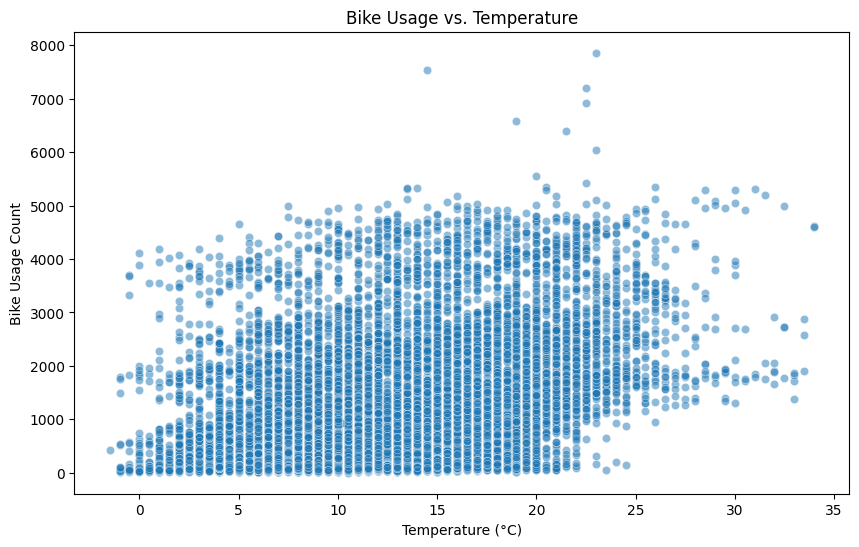

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='t1', y='cnt', data=df, alpha=0.5)
plt.title('Bike Usage vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Bike Usage Count')
plt.show()

There appears to be a positive correlation between temperature and bike usage count. As the temperature increases from around 0°C to 20°C, the number of bike rentals generally increases. This suggests that more people are likely to rent bikes in warmer weather.

Beyond 20°C, there is a noticeable spread in the data points. While some higher bike usage counts are still observed, there are also many lower counts. This spread indicates that extremely high temperatures might deter some people from biking, or there might be other factors influencing bike usage at higher temperatures.

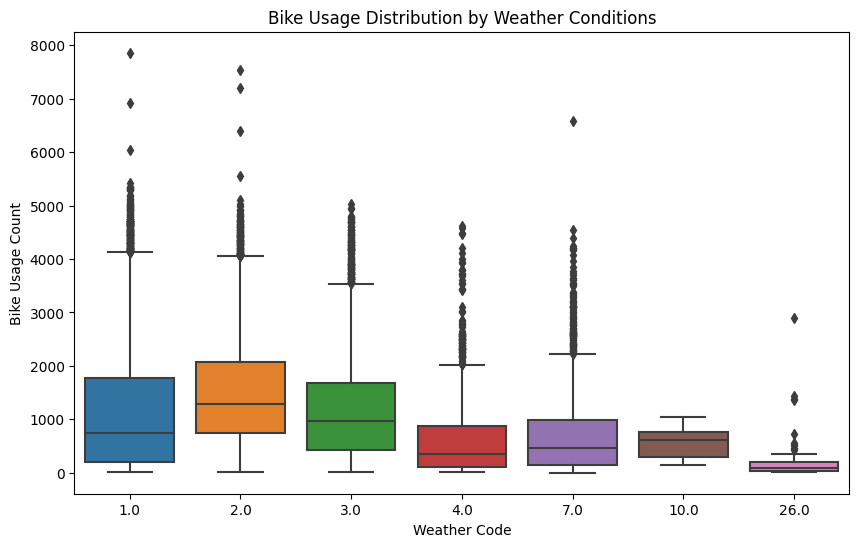

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x='weather_code', y = 'cnt', data=df)
plt.title('Bike Usage Distribution by Weather Conditions')
plt.xlabel('Weather Code')
plt.ylabel('Bike Usage Count')
plt.show()

The horizontal line inside each box represents the median bike usage count for that weather code. Weather codes 1.0, 2.0, and 3.0 have higher median bike usage compared to other weather codes. This suggests that these weather conditions are more favorable for biking.

<Axes: >

<Figure size 1000x600 with 0 Axes>

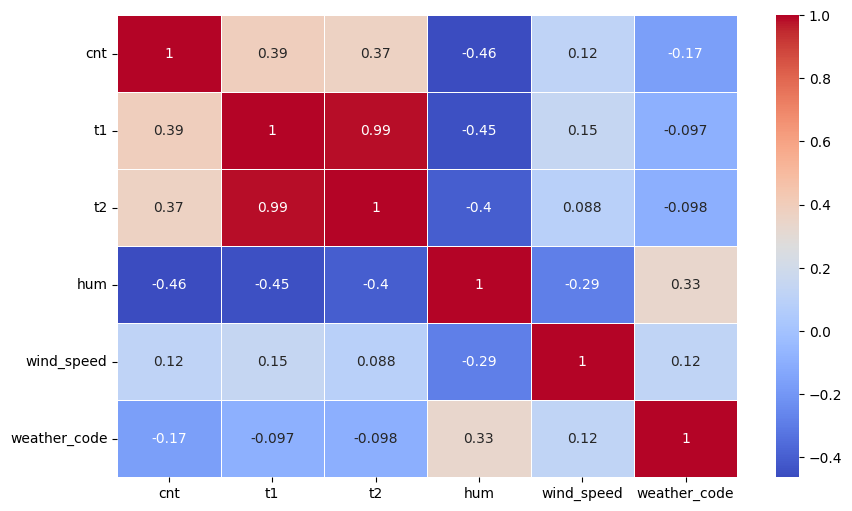

In [9]:
plt.figure(figsize=(10,6))
corr = df[['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code']].corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)


In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

start_date = '2015-01-01'
end_date = '2015-12-31'
#filtered ds on date range
filtered_df = df[(df['timestamp']>= start_date) & (df['timestamp'] <= end_date)]

total_bike_rides = filtered_df['cnt'].sum()
print(f'Total bike rides from {start_date} to {end_date}: {total_bike_rides}')

Total bike rides from 2015-01-01 to 2015-12-31: 9724959


In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by timestamp if not already sorted
df = df.sort_values(by='timestamp')

# Calculate 2-week moving average for 'cnt'
df['2_week_moving_avg'] = df['cnt'].rolling(window=14, min_periods=1).mean()

# Print or view the results
print(df[['timestamp', 'cnt', '2_week_moving_avg']])



                timestamp   cnt  2_week_moving_avg
0     2015-01-04 00:00:00   182         182.000000
1     2015-01-04 01:00:00   138         160.000000
2     2015-01-04 02:00:00   134         151.333333
3     2015-01-04 03:00:00    72         131.500000
4     2015-01-04 04:00:00    47         114.600000
...                   ...   ...                ...
17409 2017-01-03 19:00:00  1042        1279.785714
17410 2017-01-03 20:00:00   541        1287.428571
17411 2017-01-03 21:00:00   337        1211.000000
17412 2017-01-03 22:00:00   224        1019.571429
17413 2017-01-03 23:00:00   139         932.571429

[17414 rows x 3 columns]
